In [ ]:
# import libraries
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np


In [12]:
# Matplot lib graph settings
plt.style.use('dark_background') 
plt.rcParams["figure.figsize"] = (12,8)

In [13]:

# Generate clusters 
X, y = make_blobs(n_samples=150,
                  n_features=2,
                  centers=3,
                  cluster_std=0.5,
                  random_state=0)


def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

In [14]:
# aglomerative clustering
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html?highlight=agglomerativeclustering#sklearn.cluster.AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering

# cluster hierarchy
import scipy.cluster.hierarchy as sch

In [15]:
# create an object
ac = AgglomerativeClustering(affinity='euclidean',
                             linkage='ward',
                             n_clusters = 3) #n = 3 becuase we know how many clusters there are

In the code above, we created an AgglomerativeClustering object. We set the Euclidean distance to the affinity parameter and set the number of clusters to three. We also set the linkage parameter to the "ward". The linkage criteria determine the metric used for the merge strategy:

   * ward minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach and, in this sense, is similar to the k-means objective function but tackled with an agglomerative hierarchical approach.

   * maximum or complete linkage minimizes the maximum distance between observations of pairs of clusters.

   * average linkage minimizes the average of the distances between all observations of pairs of clusters.

   * single linkage minimizes the distance between the closest observations of pairs of clusters.


In [16]:
# fit and predict
y_hc = ac.fit_predict(X)

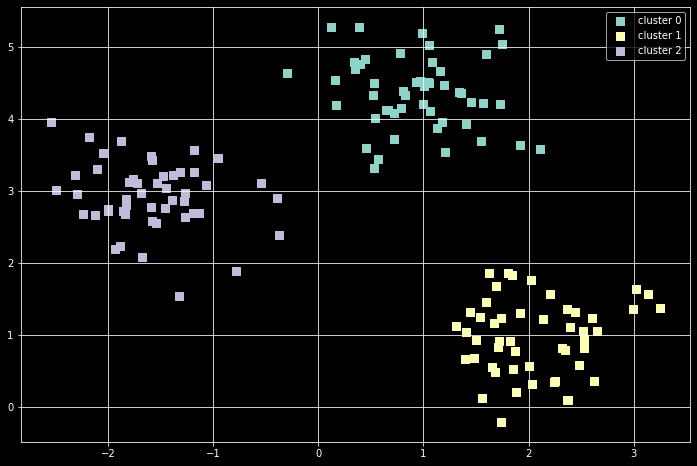

In [17]:
# Plot clustering result
plot_clusters(X,y_hc)

In [18]:
# define plot_dendrogram function
def plot_dendrogram(X,method ='ward'):
    dendrogram = sch.dendrogram(sch.linkage(X, method=method))
    plt.title("Dendrogram")
    plt.ylabel("Euclidean distances")
    plt.xlabel('Points')
    plt.show()

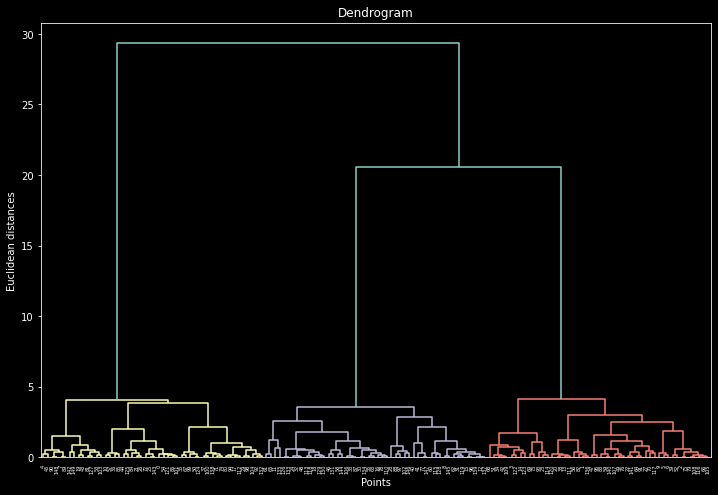

In [19]:
# Plot dendrogram
plot_dendrogram(X)